In [4]:
# Libraries
library(Seurat, quietly = TRUE)
library(scran, quietly = TRUE)

ERROR: Error in library(Seurat, quietly = TRUE): there is no package called ‘Seurat’


In [2]:
# Variables
data_dir <- "../data/JSS2020_blood/"
in_file <- paste0(data_dir, "pbmc.rds")
out_file <- paste0(data_dir, "blood.h5ad")

In [7]:
# Read data
ds <- readRDS(in_file)

In [60]:
# Create plot theme
options(repr.plot.width=12, repr.plot.height=6)
pl.theme <- ggplot2::theme_classic(20) +
ggplot2::theme(
    aspect.ratio = 1,
    axis.text = ggplot2::element_blank(),
    axis.ticks = ggplot2::element_blank()
)

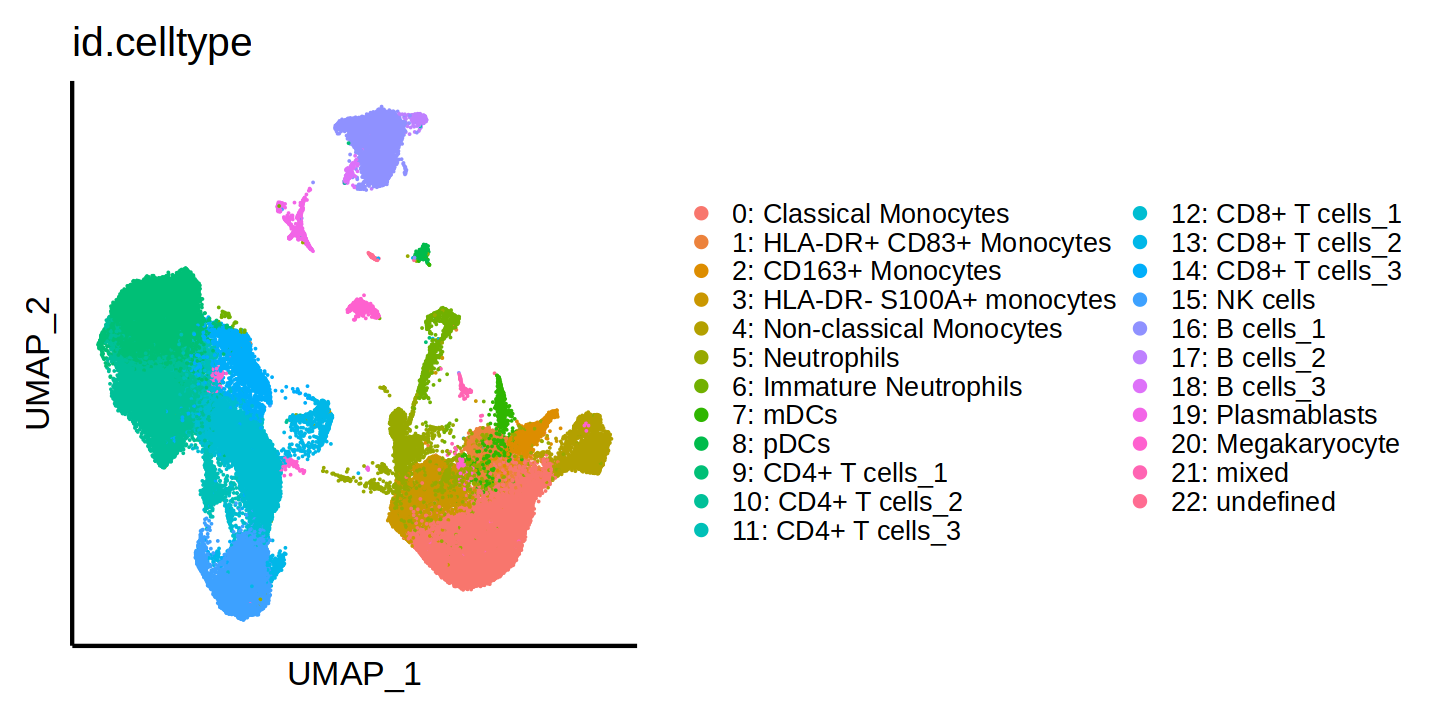

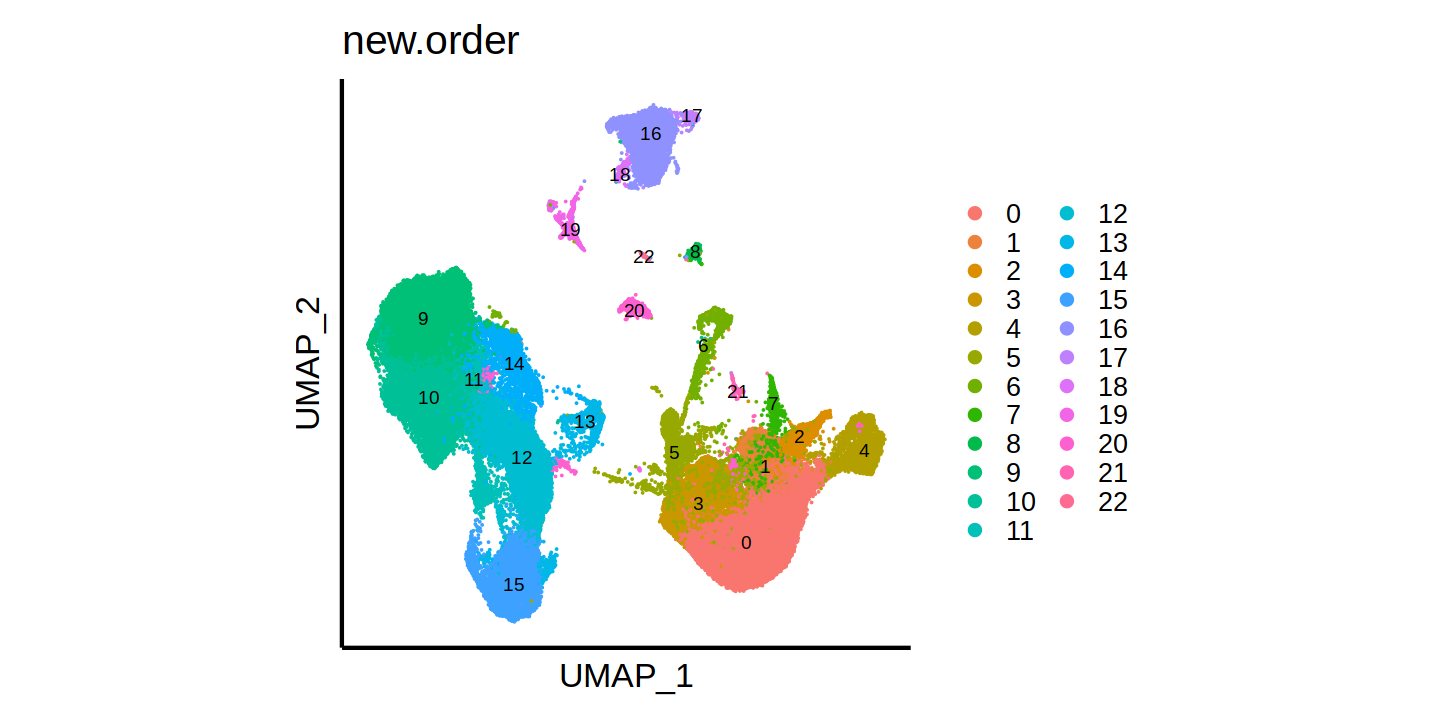

In [104]:
# Plot cell types
DimPlot(ds, group.by = "id.celltype") + pl.theme
DimPlot(ds, group.by = "new.order", label = TRUE) + pl.theme

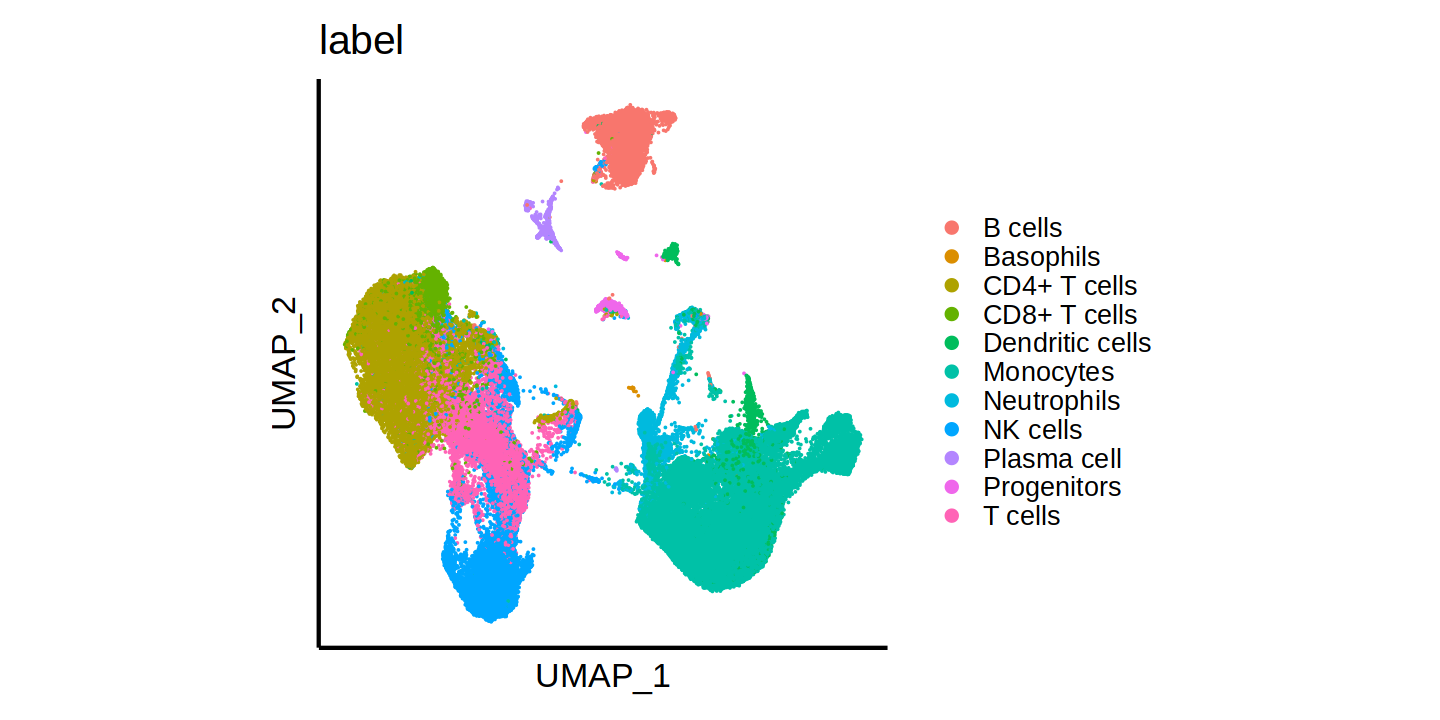

In [103]:
# Combine cell types to new annotation level
ds$label <- ds$monaco.labels
ds$label[ds$new.order == 19] <- "Plasma cell"
DimPlot(ds, group.by = "label") + pl.theme

In [107]:
# Harmonize metadata
names(ds@meta.data)
ds$libsize <- ds$nCount_RNA
ds$ngenes <- ds$nFeature_RNA
ds$percent.mt <- ds$percent.mito
ds$batch <- ds$donor

[1] "orig.ident"                                     
 [2] "nCount_RNA"                                     
 [3] "nFeature_RNA"                                   
 [4] "nReads_RNA"                                     
 [5] "nReads_ALL"                                     
 [6] "percent.mito"                                   
 [7] "percent.hb"                                     
 [8] "donor"                                          
 [9] "onset_of_symptoms"                              
[10] "days_after_onset"                               
[11] "sampleID"                                       
[12] "origID"                                         
[13] "date_of_sampling"                               
[14] "DaysAfterSample0"                               
[15] "experiment"                                     
[16] "PoolID"                                         
[17] "sampletag"                                      
[18] "hash.ID"                                        
[19] "platform"                                       
[20] "purification"                                   
[21] "cells"                                          
[22] "age"                                            
[23] "sex"                                            
[24] "group_per_sample"                               
[25] "who_per_sample"                                 
[26] "disease_stage"                                  
[27] "outcome"                                        
[28] "comorbidities"                                  
[29] "COVID.19.related_medication_and_anti.microbials"
[30] "RNA_snn_res.0.4"                                
[31] "cluster_labels_res.0.4"                         
[32] "new.order"                                      
[33] "id.celltype"                                    
[34] "hpca.labels"                                    
[35] "blueprint.labels"                               
[36] "monaco.labels"                                  
[37] "immune.labels"                                  
[38] "dmap.labels"                                    
[39] "hemato.labels"                                  
[40] "label"                                          
[41] "libsize"                                        
[42] "ngenes"                                         
[43] "percent.mt"                                     
[44] "batch"

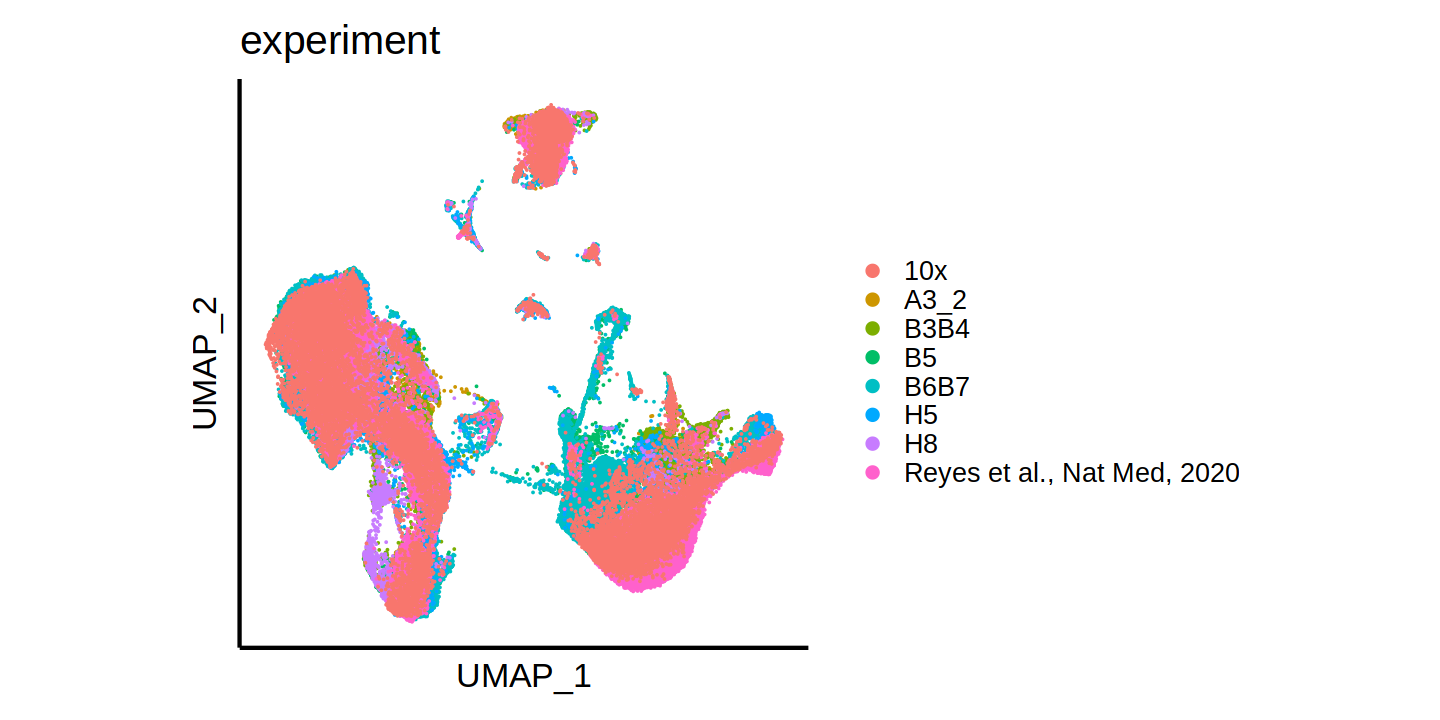

In [130]:
DimPlot(ds, group.by = "experiment") + pl.theme

In [112]:
# Create SCE
sce <- SingleCellExperiment(
    assays = list(counts = ds@assays$RNA@counts),
    colData = ds@meta.data
)

In [113]:
# Save as AnnData
zellkonverter::writeH5AD(sce, out_file)

+ '/home/odietric/.cache/R/basilisk/1.9.12/0/bin/conda' 'create' '--yes' '--prefix' '/home/odietric/.cache/R/basilisk/1.9.12/zellkonverter/1.8.0/zellkonverterAnnDataEnv-0.8.0' 'python=3.8.13' '--quiet' '-c' 'conda-forge'

+ '/home/odietric/.cache/R/basilisk/1.9.12/0/bin/conda' 'install' '--yes' '--prefix' '/home/odietric/.cache/R/basilisk/1.9.12/zellkonverter/1.8.0/zellkonverterAnnDataEnv-0.8.0' 'python=3.8.13'

+ '/home/odietric/.cache/R/basilisk/1.9.12/0/bin/conda' 'install' '--yes' '--prefix' '/home/odietric/.cache/R/basilisk/1.9.12/zellkonverter/1.8.0/zellkonverterAnnDataEnv-0.8.0' '-c' 'conda-forge' 'python=3.8.13' 'anndata=0.8.0' 'h5py=3.6.0' 'hdf5=1.12.1' 'natsort=8.1.0' 'numpy=1.22.3' 'packaging=21.3' 'pandas=1.4.2' 'python=3.8.13' 'scipy=1.7.3' 'sqlite=3.38.2'

ℹ Using the 'counts' assay as the X matrix

